## Unit 1 Capstone Analytics and Narrative
### Prepared by Robin Fladebo, October 2018

### Introduction

In reading a report published in July 2018 by UNICEF, I learned that iodine deficiency can lead to health and developmental problems (called Iodine Deficiency Disorders, or IDDs). Iodine deficiency is especially problematic during pregnancy and early childhood, and is a major cause of preventable mental retardation and diminished cognitive ability.

UNICEF compiled data about access to and consumption of iodized salt from people in many countries around the globe. The data came from two global surveys: the Multiple Indicator Cluster Survey (MICS) conducted by UNICEF, and the Demographic and Health Survey (DHS), funded by US AID.

To date, most efforts to ensure that adequate iodine is consumed have centered around providing iodized salt.
This dataset reports the proportion of households consuming salt with any iodine, regardless of the level of iodine in the salt. An adequate level of iodine in salt would be high enough, but not too high, to meet the needs of the population. The UNICEF data is only a part of the picture of iodine deficiency disorders.

The ultimate study goal, according to World Health Organization (WHO) guidelines, is to determine population iodine status in addition to data about access to iodized salt. Population iodine status can be measured using urinary iodine, with the prevalence of goiters being a secondary measure. Using population iodine status data and data about access to iodized salt -- particularly about vulnerable populations -- countries can design and manage a program to ensure that an adequate level of iodine is present in the salt that is available locally.

The most recent WHO data about median urinary iodine is from 2003. The UNICEF data on access to iodized salt includes years ranging from 1994 to 2017. The two datasets do not match each other in timeframe or in the definition of sub-groups that are surveyed.

### Dataset exploration

Dataset found at: https://data.unicef.org/topic/nutrition/iodine-deficiency/. Accessed on October 6, 2018

In [1]:
import warnings
import chardet
import csv
import pandas as pd
pd.set_option('display.max_rows', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

In [3]:
thisfile_encoding = find_encoding('UNICEF_salt.csv')
print(thisfile_encoding)

UTF-8-SIG


In [4]:
unicef_salt = pd.read_csv('UNICEF_salt.csv', encoding = 'UTF-8')

In [5]:
unicef_salt.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [6]:
unicef_salt['Year'] = pd.to_numeric(unicef_salt['Year'], errors='coerce')

In [7]:
unicef_salt['Natl_Point_Estimate'] = pd.to_numeric(unicef_salt['Natl_Point_Estimate'], errors='coerce')

In [8]:
unicef_salt['Urban_Point_Estimate'] = pd.to_numeric(unicef_salt['Urban_Point_Estimate'], errors='coerce')

In [9]:
unicef_salt['Rural_Point_Estimate'] = pd.to_numeric(unicef_salt['Rural_Point_Estimate'], errors='coerce')

#### The original dataset contains data from multiple years, ranging from 1994 to 2017

In [10]:
unicef_salt['Year'].groupby(unicef_salt['Year']).min()

Year
1994    1994
1995    1995
1996    1996
1997    1997
1998    1998
1999    1999
2000    2000
2001    2001
2002    2002
2003    2003
2004    2004
2005    2005
2006    2006
2007    2007
2008    2008
2009    2009
2010    2010
2011    2011
2012    2012
2013    2013
2014    2014
2015    2015
2016    2016
2017    2017
Name: Year, dtype: int64

#### The 20 countries with the lowest proportion of households with access to iodized salt.

In [11]:
salt_low20 = unicef_salt[['Country', 'Region', 'Year', 'Natl_Point_Estimate']].sort_values('Natl_Point_Estimate', ascending=True).head(20)
print(salt_low20)

                      Country Region  Year  Natl_Point_Estimate
166                Mauritania    WCA  2001                  2.0
115             Guinea-Bissau    WCA  2006                  3.8
77                   Djibouti    ESA  2006                  4.4
167                Mauritania    WCA  2007                  5.2
234                   Somalia    ESA  2009                  6.9
114             Guinea-Bissau    WCA  2000                  7.0
233                   Somalia    ESA  2006                  7.6
121                     Haiti    LAC  2006                 10.1
110                    Guinea    WCA  1999                 12.5
42                   Cambodia    EAP  2000                 13.8
257       Trinidad and Tobago    LAC  2000                 13.8
93                   Ethiopia    ESA  2011                 14.6
242                     Sudan    ESA  2010                 14.6
95                      Gabon    WCA  2001                 15.3
122                     Haiti    LAC  20

In [12]:
#Create dataframe containing one row for the most recent year for each country; restrict the number of columns
salt_subset = unicef_salt[['Country', 'Region', 'Year', 'Natl_Point_Estimate', 'Urban_Point_Estimate', 'Rural_Point_Estimate', 'MaleHH_Point_Estimate', 'Female_HH_Point_Estimate']].sort_values('Year', ascending=True).groupby(['Region','Country']).tail(1)

In [13]:
#Prepare data frames for use in visualizations
salt_region = salt_subset[['Region', 'Rural_Point_Estimate']].groupby(salt_subset['Region']).mean().reset_index()

In [14]:
salt_region['R_or_U'] = 'Rural'

In [15]:
salt_region = salt_region.rename(columns={'Rural_Point_Estimate':'Point_Estimate'})

In [16]:
salt_region2 = salt_subset[['Region', 'Urban_Point_Estimate']].groupby(salt_subset['Region']).mean().reset_index()

In [17]:
salt_region2['R_or_U'] = 'Urban'

In [18]:
salt_region2 = salt_region2.rename(columns={'Urban_Point_Estimate':'Point_Estimate'})

In [19]:
salt_region = pd.concat([salt_region, salt_region2],axis=0)

In [20]:
salt_rgnhh = salt_subset[['Region', 'MaleHH_Point_Estimate']].groupby(salt_subset['Region']).mean().reset_index()

In [21]:
salt_rgnhh['M_or_F'] = 'Male'

In [22]:
salt_rgnhh = salt_rgnhh.rename(columns={'MaleHH_Point_Estimate':'Point_Estimate'})

In [23]:
salt_rgnhh2 = salt_subset[['Region', 'Female_HH_Point_Estimate']].groupby(salt_subset['Region']).mean().reset_index()

In [24]:
salt_rgnhh2['M_or_F'] = 'Female'

In [25]:
salt_rgnhh2 = salt_rgnhh2.rename(columns={'Female_HH_Point_Estimate':'Point_Estimate'})

In [26]:
salt_rgnhh = pd.concat([salt_rgnhh, salt_rgnhh2],axis=0)

#### Variability in access to iodized salt in countries in selected regions of the world

Regions: WCA (West & Central Africa), LAC (Latin America & Caribbean), MENA (Middle East & North Africa), ESA (Eastern & Southern Africa), EECA (Eastern Europe & Central Asia), EAP(East Asia & Pacific), SA (South Asia)

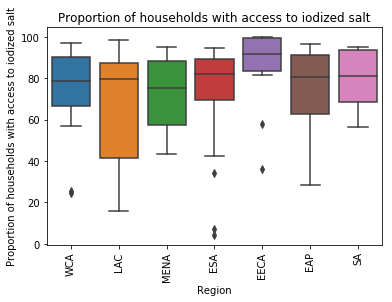

In [38]:
sns.boxplot(x="Region", y="Natl_Point_Estimate", data=salt_subset)
plt.xlabel('Region')
plt.ylabel('Proportion of households with access to iodized salt')
plt.title('Proportion of households with access to iodized salt')
plt.xticks(rotation=90);

#### Generally, a higher proportion of urban households have access to iodized salt than rural households

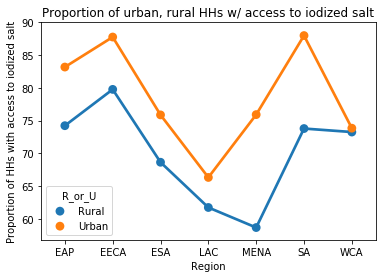

In [36]:
sns.pointplot(x="Region", y="Point_Estimate", hue="R_or_U", data=salt_region)
plt.xlabel('Region')
plt.ylabel('Proportion of HHs with access to iodized salt')
plt.title('Proportion of urban, rural HHs w/ access to iodized salt');

#### In most regions, there is not a large difference in access to iodized salt between households with a male head of household or female head of household.

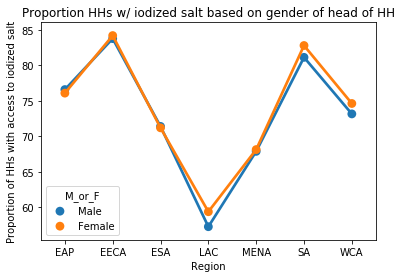

In [33]:
sns.pointplot(x="Region", y="Point_Estimate", hue="M_or_F", data=salt_rgnhh)
plt.xlabel('Region')
plt.ylabel('Proportion of HHs with access to iodized salt')
plt.title('Proportion HHs w/ iodized salt based on gender of head of HH');

### Further experimentation and analysis

#### Experimental hypothesis 
More urban households have access to iodized salt than rural households in Haiti.


#### Rollout plan
For this study, we will obtain current data about the access to iodized salt in rural and in urban households in Haiti. The method of determining the presence of iodine in the salt used in a household is to use a rapid test kit. Any level of iodine in salt qualifies as iodized salt. We will use the same questions and format as was used in the DHS survey that form the basis of dataset explored here.

The following additional information about households in the sample will be collected, and used to determine that the two groups (urban and rural households) have similar characteristics: 
1) Number of people in household; 
2) number of children (age 12 and under) in the household;  
3) Wealth quantile in which the household income falls; 
4) head of household is male or female.
These data points are consistent with those collected in the two surveys that are the basis of the UNICEF dataset explored here.

Sample size will be determined using the sample sizes used for the original DHS surveys in Haiti as a guide. Sample size will be adjusted for population change since the last survey was taken, if necessary.

#### Evaluation plan
The metric collected is the number of households in rural areas with access to iodized salt; and the number of households in urban areas having access to iodized salt. Four secondary data points are described in the preceding paragraph.

To evaluate whether there is a significant difference between the urban and rural groups we will compute a p-value. A p-value of .05 will cause us to reject the null hypothesis, meaning that we reject the idea that whether a household is in an urban or rural has no effect on access to iodized salt.